In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

#### Chi Square test applied when we have 2 categorical values from single population. It is used to determine whether there is 
#### significant association between 2 variables



## Chi Square Test for Independence 
* p < 0.05 : Reject H0 and conclude variables are correlated
* p > 0.05 : Accept H0 and conclude variables are independent
* You can test for Numeric or Categorical. If numeric then we require to do binning


In [2]:
# Load the data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Null Hypothesis: There is no relationship between 2 Categorical Variable
#### Alternative Hypothesis: There is relationship between 2 Categorical Variable
    

* Questions:
    * Is there any relationship between user who is Churned to Gender of the user?
    * Is there any relationship between user who opted for paperless billing and who has Churned?
    * Is there any relationship between user who opted for Contract and who has Churned?
    

## 1. Is there any relationship between user who is Churned to Gender of the user?

<AxesSubplot:xlabel='gender', ylabel='count'>

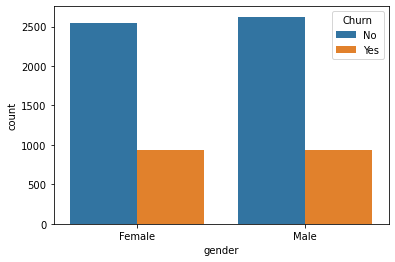

In [3]:
# 1 Gender & Churn
sns.countplot(x = data.gender, hue = data.Churn)

#### Visually we can see there is no difference in Churn rate by Gender, Let go ahead and test it statistically

In [4]:
# Contigency table
gender_churn_ct = pd.crosstab(index = data.Churn, columns = data.gender)
gender_churn_ct

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [15]:
(chi2, p, dof, _) = chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])
print('chi2', chi2)
print('p-value', p)
print('Degrees of Freedom', dof)

chi2 0.4840828822091383
p-value 0.48657873605618596
Degrees of Freedom 1


* Higher the chi2 it will be more statistically significant
* p-value > 0.05 so we accept the Null Hypothesis, Gender is not significant with Churn so we can drop the column

In [16]:
np.sqrt(chi2 / data.shape[0])

0.008290505631771371

#### Least significant variable, we can ignore this feature in our model

## 2. Is there any relationship between user who opted for paperless billing and who has Churned?


D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

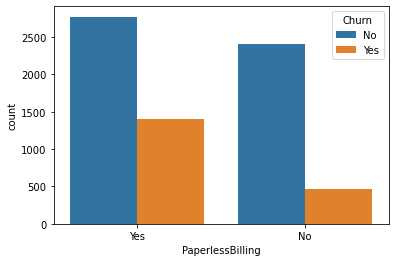

In [6]:
sns.countplot(data.PaperlessBilling, hue = data.Churn)

* Though logically it should not effect but visually we see there is significant difference for PaperlessBilling, lets test it statistically

In [7]:
paperless_churn_ct = pd.crosstab(index = data.Churn , columns = [data.PaperlessBilling])
paperless_churn_ct

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


In [8]:
(chi2, p, dof, _)  = chi2_contingency([paperless_churn_ct.iloc[0].values, paperless_churn_ct.iloc[1].values])
print('chi2', chi2)
print('p-value', p)
print('Degrees of Freedom', dof)

chi2 258.27764906707307
p-value 4.073354668665985e-58
Degrees of Freedom 1


* Here chi square is high and p-value is almost close to zero so we reject H0, there is significant importance in paperless billing 
& churn and we can use this feature in our model

In [9]:
np.sqrt(chi2 / data.shape[0])

0.19149814355338285

#### 0.19 is the significance between 2 variables

## 3. Is there any relationship between user who is Churned to Contract of the user?

<AxesSubplot:xlabel='Contract', ylabel='count'>

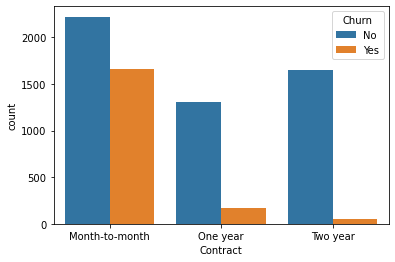

In [11]:
sns.countplot(x = data.Contract, hue = data.Churn)

In [12]:
contract_churn_ct = pd.crosstab(index = data.Churn, columns = [data.Contract])
contract_churn_ct

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [13]:
(chi, p, dof, expected) = chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values])
print('chi2', chi2)
print('p-value', p)
print('Degrees of Freedom', dof)

chi2 258.27764906707307
p-value 5.863038300673391e-258
Degrees of Freedom 2


## Cramer's V Test
* Cramer's V is very much similar to pearson's correlation coefficent. It just shows the strength of 2 Categorical values
* Value is between 0 to 1
* The more higher it is the more strength the variable has

V = SQRT( chi2 / ( n * min(Row, Col) - 1)) 

In [14]:
np.sqrt(chi / data.shape[0])

0.4101156965761409

#### Strengh of variable is 41% in both the variables (correlation)